In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as st

from IPython.display import display
%matplotlib inline

In [26]:
housing = pd.read_table('https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data',header=None, sep='\s+',
                       names = ["CRIM", "ZN", "INDUS", "CHAS", "NOX", "RM", "AGE","DIS", 
                                             "RAD", "TAX", "PTRATIO", "B", "LSTAT", "MEDV"])
housing.drop(['CHAS','ZN'], axis=1, inplace=True)
housing.shape

(506, 12)

In [27]:
stats = housing.describe().T
stats['skew'] = st.skew(housing)
stats['kurtosis'] = st.kurtosis(housing)
stats

,count,mean,std,min,25%,50%,75%,max,skew,kurtosis
CRIM,506.0,3.613524,8.601545,0.00632,0.082045,0.25651,3.677082,88.9762,5.207652,36.752786
INDUS,506.0,11.136779,6.860353,0.46000,5.190000,9.69000,18.100000,27.7400,0.294146,-1.233218
NOX,506.0,0.554695,0.115878,0.38500,0.449000,0.53800,0.624000,0.8710,0.727144,-0.075864
RM,506.0,6.284634,0.702617,3.56100,5.885500,6.20850,6.623500,8.7800,0.402415,1.861027
AGE,506.0,68.574901,28.148861,2.90000,45.025000,77.50000,94.075000,100.0000,-0.597186,-0.970014
DIS,506.0,3.795043,2.105710,1.12960,2.100175,3.20745,5.188425,12.1265,1.008779,0.471299
RAD,506.0,9.549407,8.707259,1.00000,4.000000,5.00000,24.000000,24.0000,1.001833,-0.870521
TAX,506.0,408.237154,168.537116,187.00000,279.000000,330.00000,666.000000,711.0000,0.667968,-1.142985
PTRATIO,506.0,18.455534,2.164946,12.60000,17.400000,19.05000,20.200000,22.0000,-0.799945,-0.294116
B,506.0,356.674032,91.294864,0.32000,375.377500,391.44000,396.225000,396.9000,-2.881798,7.143769


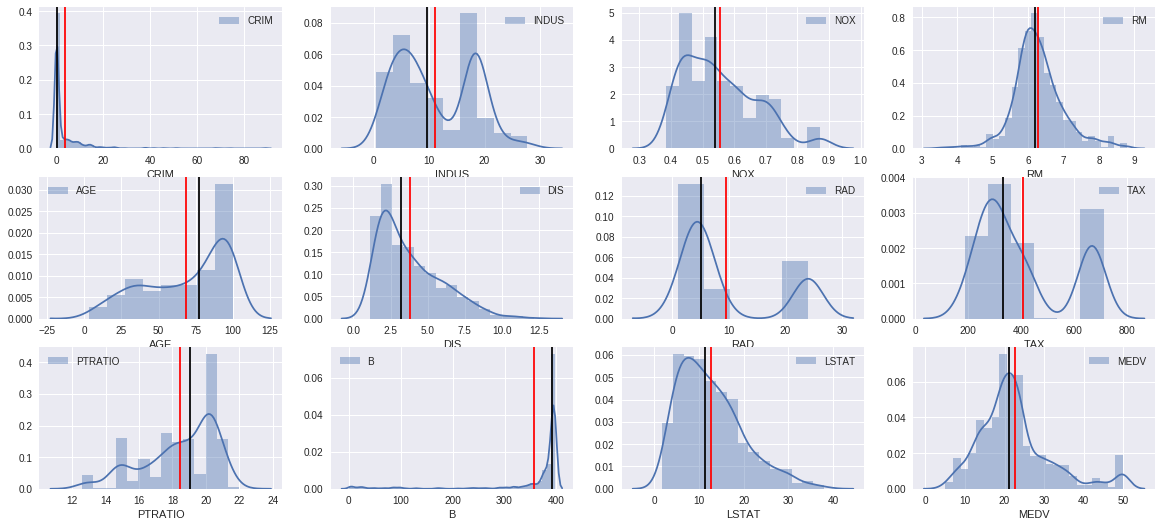

In [28]:
fig = plt.figure(figsize=(20,12))
for i, col in enumerate(housing.columns):
    fig.add_subplot(4,4,i+1)
    sns.distplot(housing[col], label=col)
    plt.axvline(housing[col].mean(), c='red')
    plt.axvline(housing[col].median(), c='black')
    plt.legend()

In [29]:
from sklearn.preprocessing import StandardScaler

In [30]:
scaler = StandardScaler()
housing_sc = scaler.fit_transform(housing)
housing_sc_df = pd.DataFrame(housing_sc, columns=housing.columns)

sc_stats = housing_sc_df.describe().T
sc_stats['skew'] = st.skew(housing_sc_df)
sc_stats['kurt'] = st.kurtosis(housing_sc_df)
display(stats)
display(sc_stats)

,count,mean,std,min,25%,50%,75%,max,skew,kurtosis
CRIM,506.0,3.613524,8.601545,0.00632,0.082045,0.25651,3.677082,88.9762,5.207652,36.752786
INDUS,506.0,11.136779,6.860353,0.46000,5.190000,9.69000,18.100000,27.7400,0.294146,-1.233218
NOX,506.0,0.554695,0.115878,0.38500,0.449000,0.53800,0.624000,0.8710,0.727144,-0.075864
RM,506.0,6.284634,0.702617,3.56100,5.885500,6.20850,6.623500,8.7800,0.402415,1.861027
AGE,506.0,68.574901,28.148861,2.90000,45.025000,77.50000,94.075000,100.0000,-0.597186,-0.970014
DIS,506.0,3.795043,2.105710,1.12960,2.100175,3.20745,5.188425,12.1265,1.008779,0.471299
RAD,506.0,9.549407,8.707259,1.00000,4.000000,5.00000,24.000000,24.0000,1.001833,-0.870521
TAX,506.0,408.237154,168.537116,187.00000,279.000000,330.00000,666.000000,711.0000,0.667968,-1.142985
PTRATIO,506.0,18.455534,2.164946,12.60000,17.400000,19.05000,20.200000,22.0000,-0.799945,-0.294116
B,506.0,356.674032,91.294864,0.32000,375.377500,391.44000,396.225000,396.9000,-2.881798,7.143769


,count,mean,std,min,25%,50%,75%,max,skew,kurt
CRIM,506.0,-1.123388e-16,1.00099,-0.419782,-0.410970,-0.390667,0.007397,9.933931,5.207652,36.752786
INDUS,506.0,2.106352e-16,1.00099,-1.557842,-0.867691,-0.211099,1.015999,2.422565,0.294146,-1.233218
NOX,506.0,-1.965929e-16,1.00099,-1.465882,-0.913029,-0.144217,0.598679,2.732346,0.727144,-0.075864
RM,506.0,-1.088282e-16,1.00099,-3.880249,-0.568630,-0.108466,0.482768,3.555044,0.402415,1.861027
AGE,506.0,-1.474446e-16,1.00099,-2.335437,-0.837448,0.317382,0.906798,1.117494,-0.597186,-0.970014
DIS,506.0,-8.425408e-17,1.00099,-1.267069,-0.805688,-0.279323,0.662371,3.960518,1.008779,0.471299
RAD,506.0,-1.123388e-16,1.00099,-0.982843,-0.637962,-0.523001,1.661245,1.661245,1.001833,-0.870521
TAX,506.0,0.000000e+00,1.00099,-1.313990,-0.767576,-0.464673,1.530926,1.798194,0.667968,-1.142985
PTRATIO,506.0,-4.212704e-16,1.00099,-2.707379,-0.488039,0.274859,0.806576,1.638828,-0.799945,-0.294116
B,506.0,-7.442444e-16,1.00099,-3.907193,0.205072,0.381187,0.433651,0.441052,-2.881798,7.143769


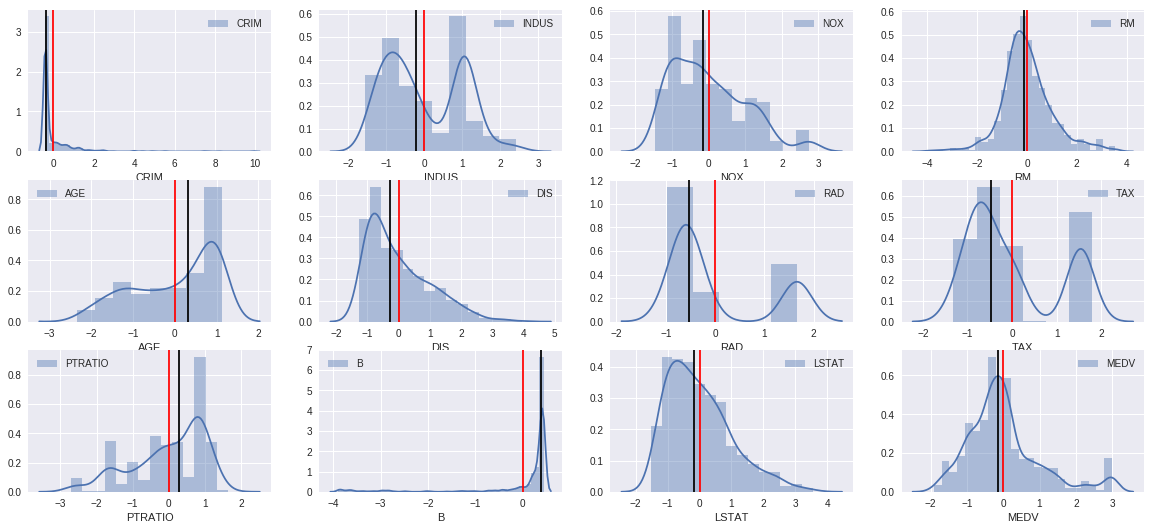

In [31]:
fig = plt.figure(figsize=(20,12))
for i, col in enumerate(housing_sc_df.columns):
    fig.add_subplot(4,4,i+1)
    sns.distplot(housing_sc_df[col], label=col)
    plt.axvline(housing_sc_df[col].mean(), c='red')
    plt.axvline(housing_sc_df[col].median(), c='black')
    plt.legend()

In [32]:
housing_log = np.log(housing)

scaler.fit(housing_log)
housing_log_sc = scaler.transform(housing_log)
housing_log_sc_df = pd.DataFrame(housing_log_sc, columns=housing.columns)

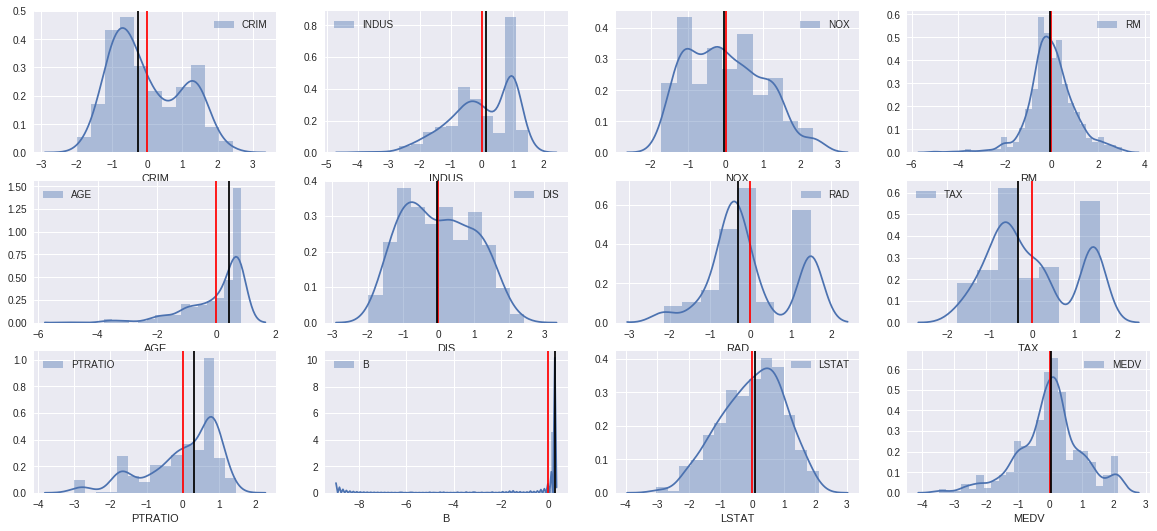

In [33]:
fig = plt.figure(figsize=(20,12))
for i, col in enumerate(housing_sc_df.columns):
    fig.add_subplot(4,4,i+1)
    sns.distplot(housing_log_sc_df[col], label=col)
    plt.axvline(housing_log_sc_df[col].mean(), c='red')
    plt.axvline(housing_log_sc_df[col].median(), c='black')
    plt.legend()

In [34]:
housing_box_cox = pd.DataFrame()
for col in housing.columns:
    box_cox_trans = st.boxcox(housing[col])[0]
    housing_box_cox[col] = pd.Series(box_cox_trans)

In [35]:
scaler.fit(housing_box_cox)
housing_box_cox_sc = scaler.transform(housing_box_cox)
housing_box_cox_sc_df = pd.DataFrame(housing_box_cox_sc, columns=housing.columns)

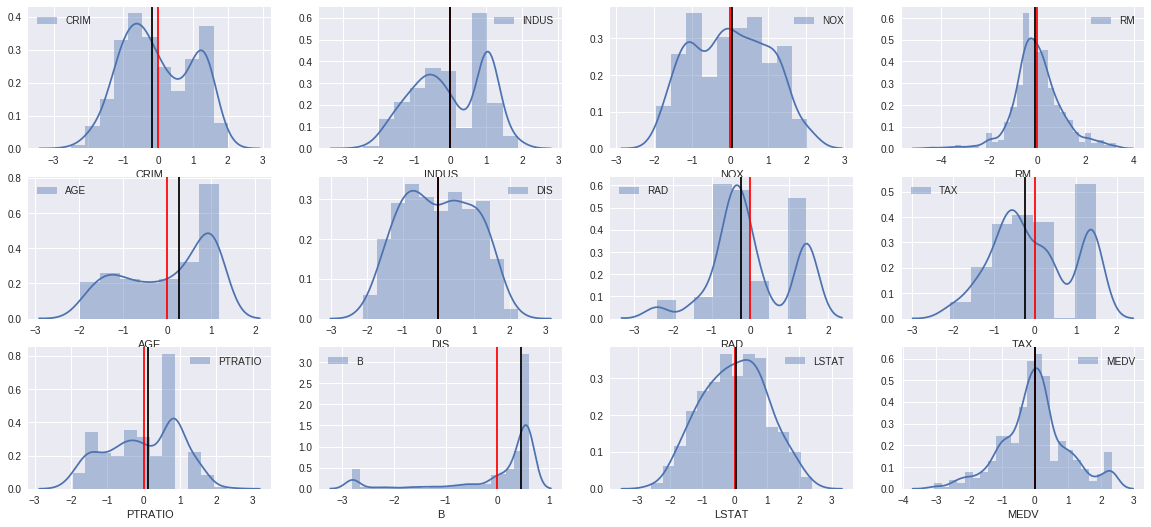

In [36]:
fig = plt.figure(figsize=(20,12))
for i, col in enumerate(housing_sc_df.columns):
    fig.add_subplot(4,4,i+1)
    sns.distplot(housing_box_cox_sc_df[col], label=col)
    plt.axvline(housing_box_cox_sc_df[col].mean(), c='red')
    plt.axvline(housing_box_cox_sc_df[col].median(), c='black')
    plt.legend()

In [37]:
housing_box_cox_sc_df.to_pickle('final_box_cox_sc.p')